In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.applications import inception_resnet_v2


import pickle
from skimage.transform import resize
from skimage.io import imread

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 40 kB 6.9 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
model = tf.keras.models.load_model('drive/MyDrive/multi_label_model')

In [ ]:
model.save("drive/MyDrive/model.h5")


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 model (Functional)          (None, 1536)              54336736  
                                                                 
 dense (Dense)               (None, 60)                92220     
                                                                 
Total params: 54,428,956
Trainable params: 92,220
Non-trainable params: 54,336,736
_________________________________________________________________


In [ ]:
!tensorflowjs_converter  --quantization_bytes 1 --input_format keras --weight_shard_size_bytes 60000000 'model.h5' 'drive/MyDrive/modeltfjs2'

Please consider using --quantize_uint8, --quantize_uint16, --quantize_float16.


In [ ]:
!tensorflowjs_converter --input_format tf_saved_model --weight_shard_size_bytes 55000000 --saved_model_tags=serve 'drive/MyDrive/multi_label_model' 'drive/MyDrive/modeltfjs4'

2022-06-01 01:58:11.754701: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Writing weight file drive/MyDrive/modeltfjs4/model.json...


In [ ]:
!tensorflowjs_converter  --quantize_uint8 --input_format keras --weight_shard_size_bytes 55000000 'drive/MyDrive/model.h5' 'drive/MyDrive/modeltfjs5'

In [ ]:
!tensorflowjs_converter --input_format keras --weight_shard_size_bytes 55000000 'drive/MyDrive/model.h5' 'drive/MyDrive/modeltfjs6'

In [ ]:
import pickle
opener = open(f'drive/MyDrive/dict_of_labels.pickle', 'rb')
named_labels = pickle.load(opener)
opener.close()

In [ ]:
print(named_labels)
import json
json_object = json.dumps(named_labels, indent = 4)
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

{0: 'Chihuahua', 1: 'Japanese_spaniel', 2: 'Maltese_dog', 3: 'Pekinese', 4: 'Shih_Tzu', 5: 'Blenheim_spaniel', 6: 'papillon', 7: 'toy_terrier', 8: 'Rhodesian_ridgeback', 9: 'Afghan_hound', 10: 'basset', 11: 'beagle', 12: 'bloodhound', 13: 'bluetick', 14: 'black_and_tan_coonhound', 15: 'Walker_hound', 16: 'English_foxhound', 17: 'redbone', 18: 'borzoi', 19: 'Irish_wolfhound', 20: 'Italian_greyhound', 21: 'whippet', 22: 'Ibizan_hound', 23: 'Norwegian_elkhound', 24: 'otterhound', 25: 'Saluki', 26: 'Scottish_deerhound', 27: 'Weimaraner', 28: 'Staffordshire_bullterrier', 29: 'American_Staffordshire_terrier', 30: 'Bedlington_terrier', 31: 'Border_terrier', 32: 'Kerry_blue_terrier', 33: 'Irish_terrier', 34: 'Norfolk_terrier', 35: 'Norwich_terrier', 36: 'Yorkshire_terrier', 37: 'wire', 38: 'Lakeland_terrier', 39: 'Sealyham_terrier', 40: 'Airedale', 41: 'cairn', 42: 'Australian_terrier', 43: 'Dandie_Dinmont', 44: 'Boston_bull', 45: 'miniature_schnauzer', 46: 'giant_schnauzer', 47: 'standard_sch

In [9]:
def name_the_breed(raw_picture, model, named_labels):
  picture = resize(raw_picture, (299, 299), preserve_range = True)
  picture = tf.keras.applications.inception_resnet_v2.preprocess_input(picture)
  picture = tf.expand_dims(picture, axis = 0)
  predictions1 = model.predict(picture)
  predictions = predictions1[0]
  prediction = max(predictions)
  predictions = list(predictions)
  index = list(predictions).index(prediction)
  score1 = f'This is a {named_labels[index]} with {round((100 * prediction), 2)} % certainty'
  indexvalues = list(predictions)
  predictions.sort()
  max2 = predictions[-2]
  index2 = indexvalues.index(max2)
  score2 = f'2nd prediction - {named_labels[index2]} with {round((100 * max2), 2)} % certainty'
  return  [score1, score2, picture]

In [8]:
opener = open(f'drive/MyDrive/dict_of_labels.pickle', 'rb')
named_labels = pickle.load(opener)
opener.close()

2nd prediction - Norwich_terrier with 3.63 % certainty
tf.Tensor(
[[[[-0.27327552 -0.47712123 -0.7359827 ]
   [-0.35470295 -0.5511925  -0.813732  ]
   [-0.38014296 -0.5685679  -0.8231097 ]
   ...
   [ 0.29836112  0.16521738  0.0397272 ]
   [ 0.22011936  0.08678602 -0.03870418]
   [ 0.04488306 -0.10174951 -0.22059008]]

  [[-0.267471   -0.46923304 -0.72913635]
   [-0.35157743 -0.54062533 -0.8068857 ]
   [-0.37329662 -0.5669307  -0.8162634 ]
   ...
   [ 0.29315194  0.16521738  0.0397272 ]
   [ 0.22011936  0.08678602 -0.03870418]
   [ 0.05068757 -0.09594499 -0.21478558]]

  [[-0.26024002 -0.45058808 -0.7161983 ]
   [-0.344639   -0.53588605 -0.7935175 ]
   [-0.36595187 -0.56173235 -0.8057635 ]
   ...
   [ 0.2925831   0.16521738  0.0397272 ]
   [ 0.22011936  0.08678602 -0.03870418]
   [ 0.0513214  -0.09531116 -0.21415175]]

  ...

  [[ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   ...
   [ 1.          1.          1. 

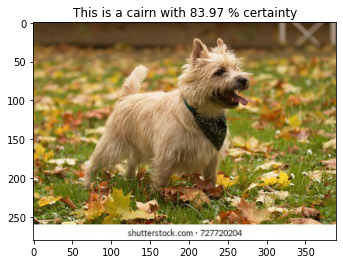

In [ ]:
dog_image = 'https://image.shutterstock.com/image-photo/cairn-terrier-plays-garden-260nw-727720204.jpg'
dog_image = imread(dog_image)
plt.imshow(dog_image)
[score1, prediction2, picture] = name_the_breed(dog_image, model, named_labels=named_labels)
plt.title(score1)
print(prediction2)
print(picture)

In [5]:
model2 = tf.keras.models.load_model('drive/MyDrive/model_comp.h5')

2nd prediction - cairn with 0.75 % certainty
tf.Tensor(
[[[[-0.27327551 -0.47712124 -0.73598269]
   [-0.35470295 -0.55119252 -0.81373205]
   [-0.38014296 -0.56856786 -0.82310971]
   ...
   [ 0.29836112  0.16521739  0.0397272 ]
   [ 0.22011935  0.08678602 -0.03870418]
   [ 0.04488306 -0.10174951 -0.22059009]]

  [[-0.267471   -0.46923305 -0.72913634]
   [-0.35157744 -0.54062533 -0.8068857 ]
   [-0.37329661 -0.56693069 -0.81626336]
   ...
   [ 0.29315194  0.16521739  0.0397272 ]
   [ 0.22011935  0.08678602 -0.03870418]
   [ 0.05068757 -0.09594499 -0.21478557]]

  [[-0.26024002 -0.45058806 -0.71619835]
   [-0.34463899 -0.53588603 -0.79351747]
   [-0.36595187 -0.56173234 -0.80576346]
   ...
   [ 0.29258312  0.16521739  0.0397272 ]
   [ 0.22011935  0.08678602 -0.03870418]
   [ 0.0513214  -0.09531117 -0.21415175]]

  ...

  [[ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   ...
   [ 1.          1.          1.        ]
 

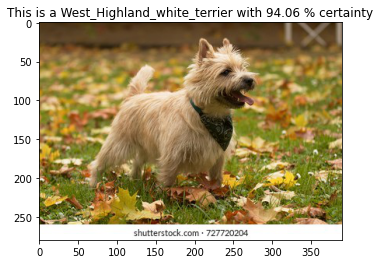

In [10]:
dog_image = 'https://image.shutterstock.com/image-photo/cairn-terrier-plays-garden-260nw-727720204.jpg'
dog_image = imread(dog_image)
plt.imshow(dog_image)
[score1, prediction2, picture] = name_the_breed(dog_image, model2, named_labels=named_labels)
plt.title(score1)
print(prediction2)
print(picture)

In [11]:
!tensorflowjs_converter  --quantize_uint8 --input_format keras --weight_shard_size_bytes 55000000 'drive/MyDrive/model_comp.h5' 'drive/MyDrive/modeltfjs2.1'